#<center> ML Task 2 </center>
In this task you will learn how to use data visulaization Tools in order to build up a good analysis on the Data using pandas, numpy and matplotlib

## Introduction

### Import libraries
for this task we would use 4 libraries

*   numpy   &nbsp; &emsp;  - to deal with numarical data
*   pandas   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  - to read,query, aggregate and modify dataset
*   matplotlib &nbsp;- to visualize data
*   seaborn  &emsp;  - to visualize data

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Read dataset
in order to load dataset we would use function ``read_csv('filepath')`` from pandas library, which takes dataset path and return DataFrame object

In [382]:
## load House price dataset using pd.read_csv() function and assign it to variable named data
## you will need to write one line of code
## your code starts here
data=pd.read_csv('House_Price.csv')


now to view the first 5 rows of the Data we use ``head()`` method which returns the first 5 rows of the data in a tableur form

In [383]:
## use head() method to view the first 5 rows
## you will need to write one line of code
## your code starts here
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1.50,1340,7912,1.5,0,NaN,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2.50,3650,9050,2.0,0,4.0,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2.00,1930,11947,1.0,0,0.0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2.25,2000,8030,1.0,0,0.0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2.50,1940,10500,1.0,0,0.0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


first we need to check the amount of null values in the dataframe using ``isnull().sum()`` method

In [384]:
## use isnull().sum() method to view count of null values in the data
## you will need to write one line of code
## your code starts here
data. isnull().sum()

date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view             920
condition          0
sqft_above         0
sqft_basement      0
yr_built           5
yr_renovated       0
street           460
city               0
statezip           0
country            0
dtype: int64

to get some useful statistics on the data we use ``describe()`` method on the DataFrame 

In [385]:
## use describe() method to get statistical info on the Data
## you could also transpose the output using .T method to get better view on the Data
## you will need to write one line of code
## your code starts here
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,3680.000000,4600.000000,4600.000000,4600.000000,4595.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240761,3.451739,1827.265435,312.081522,1970.790207,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.781807,0.677230,862.168977,464.137228,29.730526,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### clean DataFrame

sometimes data gets saved in the wrong datatype in pandas Dataframe, so we need to fix that.

In [386]:
## print all columns datatypes using .dtypes attribute on dataframe
## you will need to write one line of code
## your code starts here
data.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view             float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built         float64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

as you can see the date column is saved as an object rather than datetime.
<br />
so we need to cast date column into datetime using ``astype('datetime64[ns]')`` method on ``data['date']``

In [387]:
## cast date to datetime64
## you will need to write one line of code
## your code starts here
data['date'] =data['date'].astype('datetime64[ns]')

now we want to deal with null values in the date.
</br>
thier are multiple ways to deal with missing data in pandas


1.   ``fillna(some_value,inplace=True)``- to replace all null values with a specific value
1. ``ffill(inplace=True)`` - to replace all null values with the next non-null value
1. ``bfill(inplace=True)``-  to replace all null values with the previous non-null value
2.   ``dropna(inplace=True)`` - to drop all rows contains null data
3. ``dropna(axis = 1,inplace=True)`` to drop all columns that contains null data



In [388]:
## from the methods above try to deal with null values in the data
## you will need to write one or more lines of code
## your code starts here
data['view']=data['view'].dropna(inplace=True)
data['street']=data['street'].fillna('There is not found',inplace=True)

now display data once again using ``.head()`` method

In [389]:
## you will need to write one or more lines of code
## your code starts here
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,None,3,1340,0,1955.0,2005,None,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,None,5,3370,280,1921.0,0,None,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,None,4,1930,0,1966.0,0,None,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,None,4,1000,1000,1963.0,0,None,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,None,4,1140,800,1976.0,1992,None,Redmond,WA 98052,USA


another important thing to take care of is data scaling. </br>
as we can see from the table, not all numarical values scales equally.</br> so we need to rescale data using min-max technique.</br>
for each column we need to:

1.   caculate minimam value using ``.min()`` method
2.   caculate maximum value using ``.max()`` method
3.   noramlized_value = (orig_value - min)/(max-min)

$$ \tilde{x}_i = \frac{x_i - x_{min}}{x_{max} - x_{min}}. $$






In [390]:
## normalize all numarical[int64,float64] columns not including price
## you will need to write 10 or more lines of code
## your code starts here 

data.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                     object
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                float64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

### Data visualization

#### single plot
to visualize single plot you can call your plot directly in one cell, then call ``plt.show()``

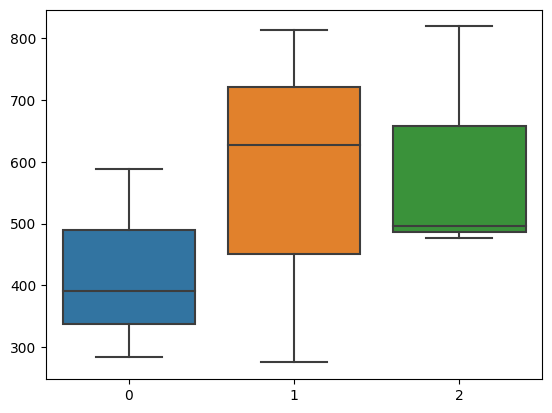

In [391]:
#example
sns.boxplot(np.random.randint(0, 1000, size=[3,3]))
plt.show()

#### multiple plots








to visualize multiple plots at the same time we need to follow some steps


*   create figure object using `` plt.figure(figsize=(height,width))`` and give it hight and width
*   use ``fig.add_subplot(position_code)`` to configure plot location in a grid

*   initialize your desire plot
*   after finishing all plots use ``plt.tight_layout()`` to display your layout

position_code can be set using one of the following values
*   221 - top left
*   222 - top right
*   223 - bottom left
*   224 - bottom right

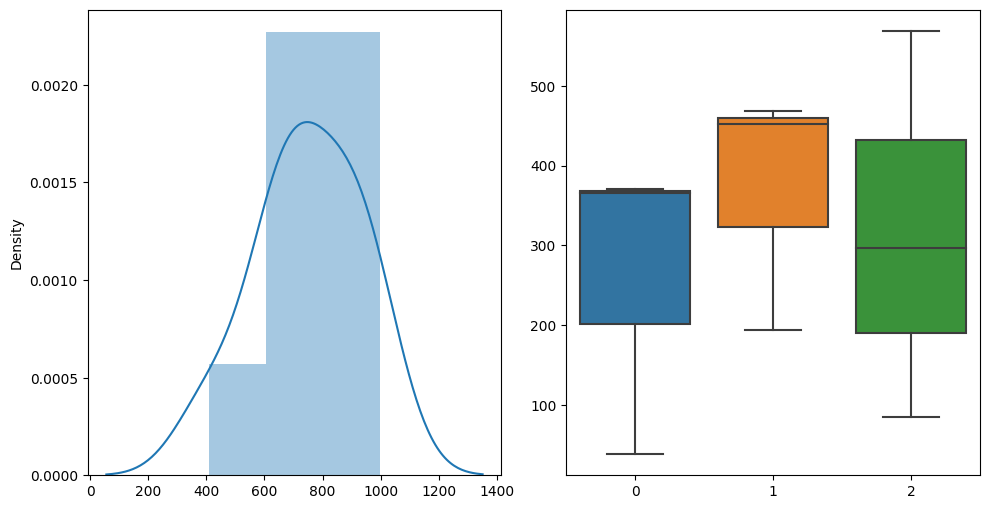

In [392]:
#example
fig=plt.figure(figsize=(10,10))
fig.add_subplot(221)
sns.distplot(np.random.randint(0, 1000, size=[3,3]))
fig.add_subplot(222)
sns.boxplot(np.random.randint(0, 1000, size=[3,3]))
plt.tight_layout()

#### distributions plots

distributions plots or distplots are plots that responsible for visualizion data distribution like histogram,line plot and box plot
* Box plot </br>
to create box plot we use ``sns.boxplot(data)``
* other distributions plots </br>
to create any other dist plots we use ``sns.displot(dataframe,x=column_name,kind=plot_type)``

for all possible plot combinations check this [link](https://seaborn.pydata.org/tutorial/distributions.html)

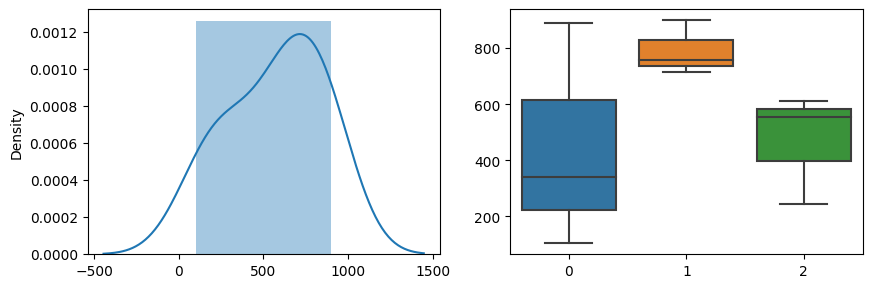

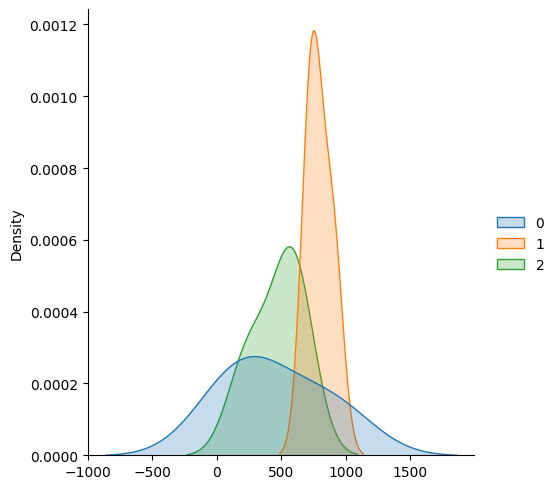

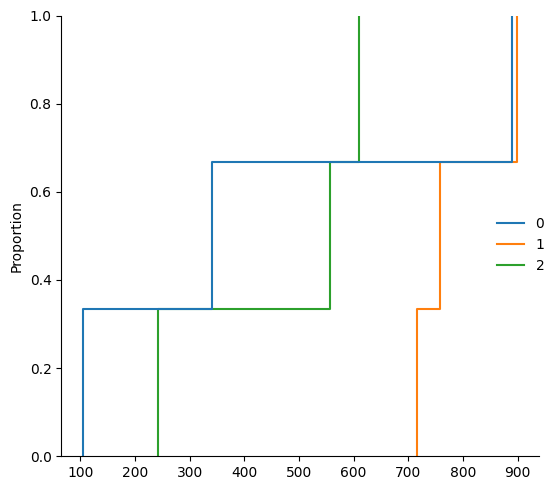

In [393]:
#example
random_data = np.random.randint(0, 1000, size=[3,3])
fig=plt.figure(figsize=(10,7))
fig.add_subplot(221)
sns.distplot(random_data,bins=1) #histogram
fig.add_subplot(222)
sns.boxplot(random_data) #boxplot
sns.displot(random_data, kind="kde",fill=True) #gaussian distrbution
sns.displot(random_data, kind="ecdf") #Empirical cumulative distributions
plt.tight_layout()

#### statistical relationships plots

to plot statistical relationships plots
you could use ``plot(x=first_col,y=second_col,kind=plot_type)`` method directly on the dataframe
or use ``sns.relplot(x=data_x,y=data_y,kind=plot_type)``

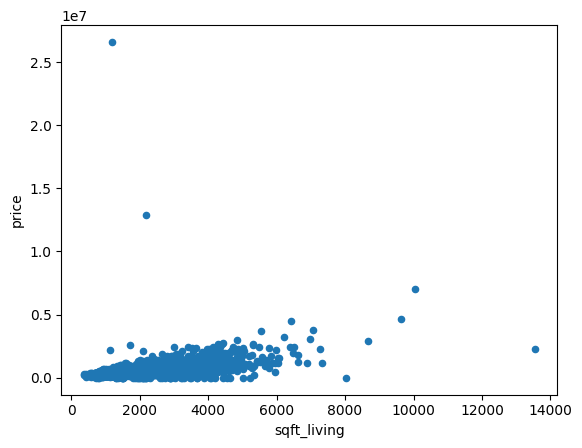

In [394]:
#example
#plot on dataframe directly
data.plot(x='sqft_living',y='price',kind='scatter')
plt.show()

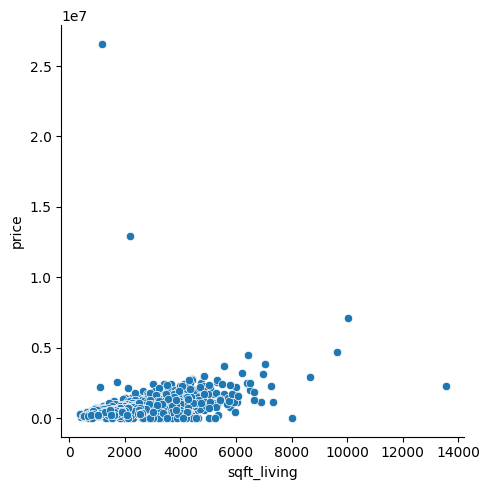

In [395]:
#example plot using sns
sns.relplot(data=data,x='sqft_living',y='price')
plt.show()

#### your turn
use data visualization plotting to check the normal distrbution on the data and the statistical relationships between price and other columns

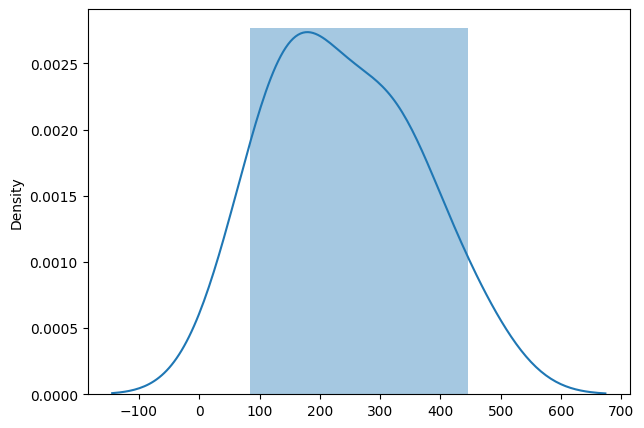

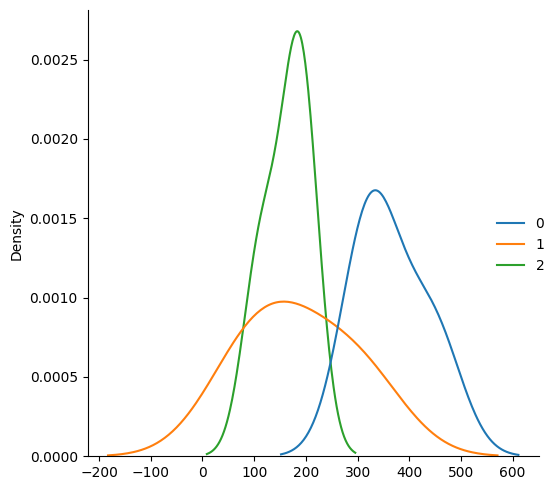

In [396]:
# use diffrent plotting techniuqes to check for normal distrbution
# you are expected to write 10 or more line of code
# your code starts here
rand_data=np.random.randint(0,500,size=(3,3))
fig=plt.figure(figsize=(7,5))
sns.distplot(rand_data,bins=1)
sns.displot(rand_data,kind='kde') #  can make it as long as i counld make noraml line
plt.tight_layout()

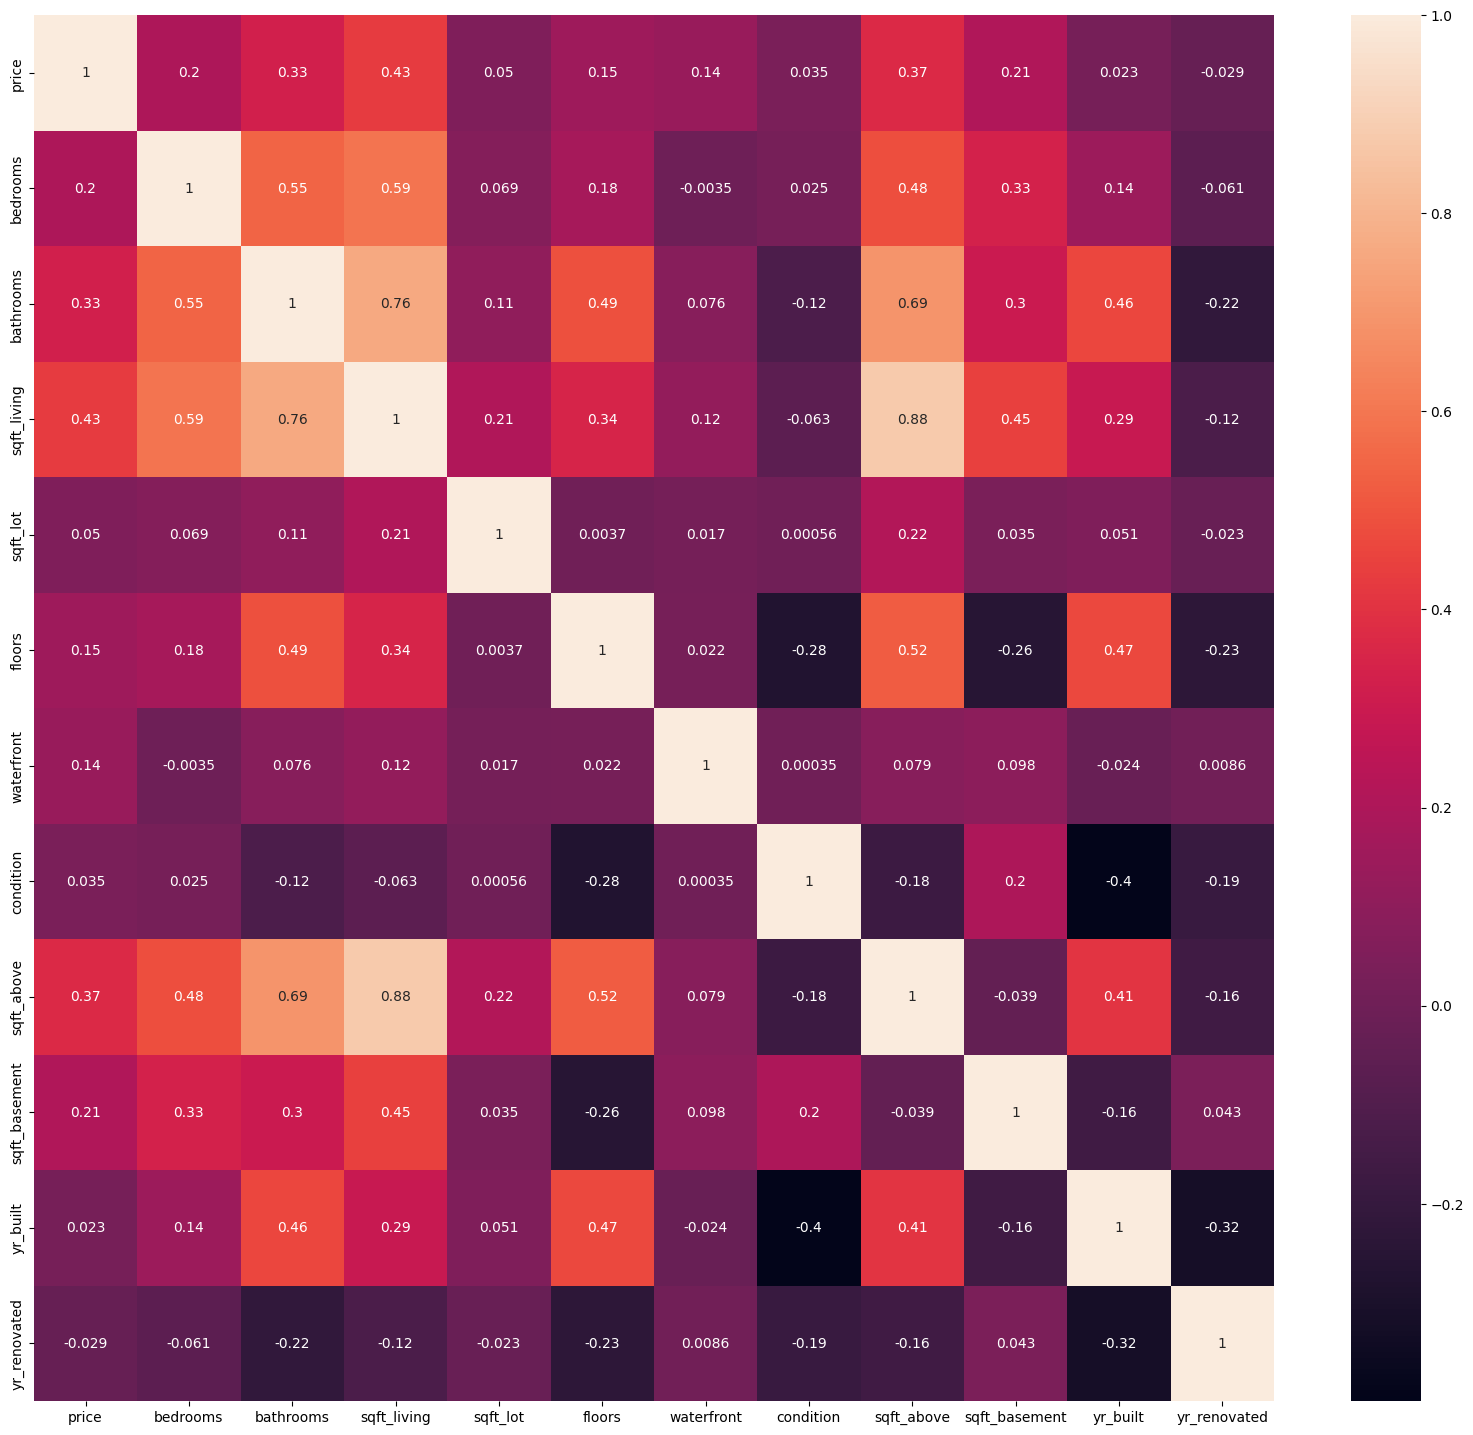

In [397]:
# use diffrent plotting techniuqes to check for statistical relationships between price and other columns
# use at least two diffrent plots including heatmap
# you are expected to write 10 or more line of code
# your code starts here
fig=plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True)
plt.show()


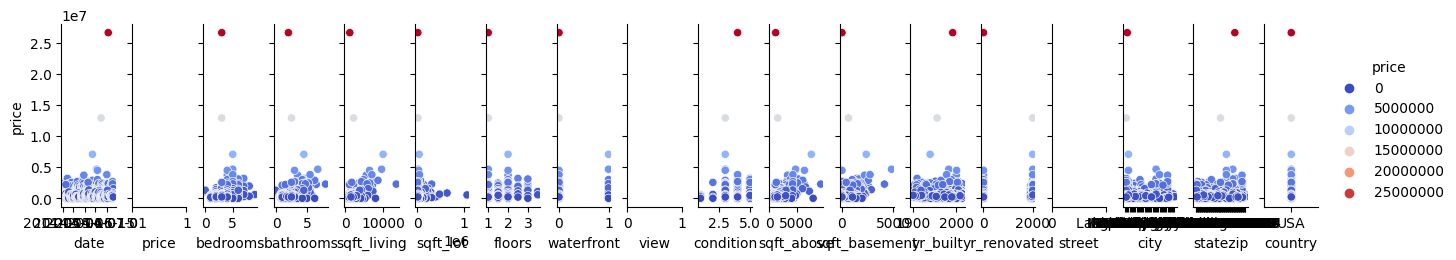

In [398]:
sns.pairplot(
    data,
    x_vars=list(data.columns),
    y_vars=["price"],hue='price',
    palette='coolwarm' , height=2.5,aspect=.3
)

In [431]:
#write down your findings here

" from figure one corrleations : \nprice is more corrleated with columns ['sqft_living','sqft_above','bathrooms']\n"

from figure one corrleations : 
price is more corrleated with columns ['sqft_living','sqft_above','bathrooms']

---
## <center>Task</task>

Now that you've learned analysis and preprocessing basics from the **session** and the **previous part**, Time to apply your knowledge on **real data**


<blockquote>
Since most of us are in our senior year we're looking for jobs in the Data Science/ML field, so what did we do?

Exactly! we gathered some data for job offerings, However because we're so busy we didn't have the time to explore it.
<br><br>

But then we had this **Genius** idea, why don't you guys explore the data for us?!

We knew you wouldn't say no, so thanks in advance.
We promise to pay you once we're hired 🤝
</blockquote>


### Data Description

You are dealing with Salary Prediction dataset from [glassdoor.com](https://www.glassdoor.com/)
and your job is to analyze the data and answer a couple of questions about it


The Descriptions of some columns that may not be clear:
- `Rating` : Company Rating
- `avg_salary` : Calculated from `Salary Estimate` by averaging min and max
- `python_yn` : Is python Required for the job
- `excel_yn` : Is excel Required for the job
- `job_simp` : Simplification of the `Job Title` column values

<sub><a href="https://www.kaggle.com/thedevastator">Dataset Credits<a><sub>

The Questions are divided as follows:
- **Mandatory** : You must provide an answer for these questions, your task is considered >>**incomplete**<< without them.
- **Extra** : They provide extra practice for you, however you can deliver your task without them.
- ⭐⭐**Challenge**⭐⭐: For those wanting the to take the extra steps in becoming the next Elon Musk/Bill Gates/[Your Favorite Idol]

In [400]:
#your code starts here
salary_data = pd.read_csv("SalaryEstimation.csv")

In [401]:
# display 5 columns .
salary_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Industry,Sector,Revenue,avg_salary,python_yn,excel,job_simp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,1973,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),72.0,1,1,data scientist
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,1984,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),87.5,1,0,data scientist
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Security Services,Business Services,$100 to $500 million (USD),85.0,1,1,data scientist
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA",1001 to 5000 employees,1965,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),76.5,1,0,data scientist
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Advertising & Marketing,Business Services,Unknown / Non-Applicable,114.5,1,1,data scientist


In [402]:
#are there missing values(nan) in data??
salary_data.isnull().sum()

Job Title          0
Salary Estimate    0
Job Description    0
Rating             0
Company Name       0
Location           0
Size               0
Founded            0
Industry           0
Sector             0
Revenue            0
avg_salary         0
python_yn          0
excel              0
job_simp           0
dtype: int64

In [403]:
#are data types for columns are right???
salary_data.dtypes

Job Title           object
Salary Estimate     object
Job Description     object
Rating             float64
Company Name        object
Location            object
Size                object
Founded              int64
Industry            object
Sector              object
Revenue             object
avg_salary         float64
python_yn            int64
excel                int64
job_simp            object
dtype: object

In [404]:
# describe the data . are the values is right??
salary_data.describe()

,Rating,Founded,avg_salary,python_yn,excel
count,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,100.626011,0.528302,0.522911
std,0.801210,497.183763,38.855948,0.499535,0.499812
min,-1.000000,-1.000000,13.500000,0.000000,0.000000
25%,3.300000,1939.000000,73.500000,0.000000,0.000000
50%,3.700000,1988.000000,97.500000,1.000000,1.000000
75%,4.000000,2007.000000,122.500000,1.000000,1.000000
max,5.000000,2019.000000,254.000000,1.000000,1.000000


we see that min in founded is negative number and it is not right value (founded=**year**) .let's correct it.

In [405]:
salary_data['Founded'].replace(-1,0,inplace=True)

### Mandatory Questions

What's the average company rating

In [406]:
salary_data['Rating'].mean()     

3.6188679245283017

**Graph** representing the amount of jobs in different Sectors

<Axes: xlabel='count', ylabel='Sector'>

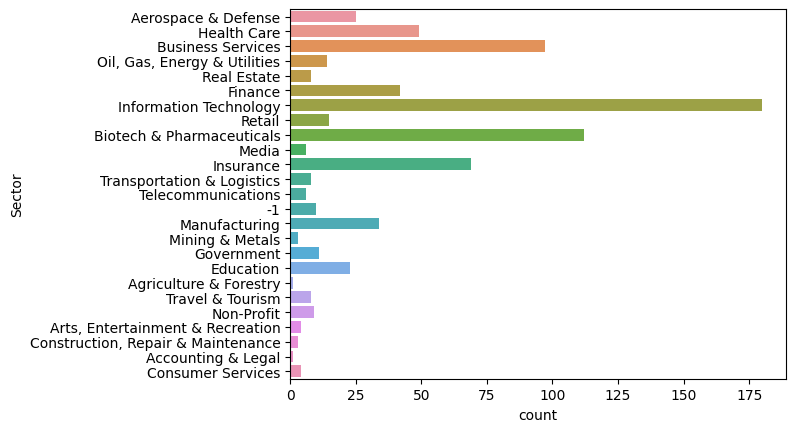

In [407]:
sns.countplot(y=salary_data['Sector']) 

What are the **average salaries** of jobs requiring **python** and the average salaries of jobs requiring **no python**

In [408]:
salary_data.groupby('python_yn')['avg_salary'].mean()

python_yn
0     87.155714
1    112.653061
Name: avg_salary, dtype: float64

**Graph** representing percentage of each job title 

<sub>(psst, you can use `job_simp` instead of `Job Title` column)</sub>

In [409]:
jobs=salary_data['job_simp'].unique().tolist()

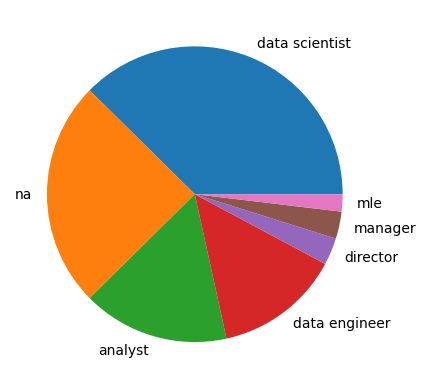

In [410]:
plt.pie(salary_data['job_simp'].value_counts(),labels =jobs);

What's the year with the most founded companies

In [411]:
salary_data['Founded'].mode()

0    0
Name: Founded, dtype: int64

**Graph** comparing the count of jobs **requiring** and **not requiring** excel

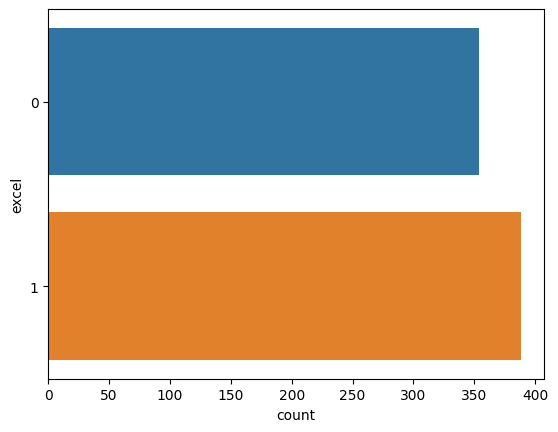

In [412]:
sns.countplot(y=salary_data['excel']);
#comparing

Are the `avg_salary` values normally distributed? (Use a **Graph** to visualize your answer)

<font size=3, color='gray'>But wait, what's a "normal distribution"? <br><sub>
Go give it a quick google search and come back so we can continue our task.<sub></font>

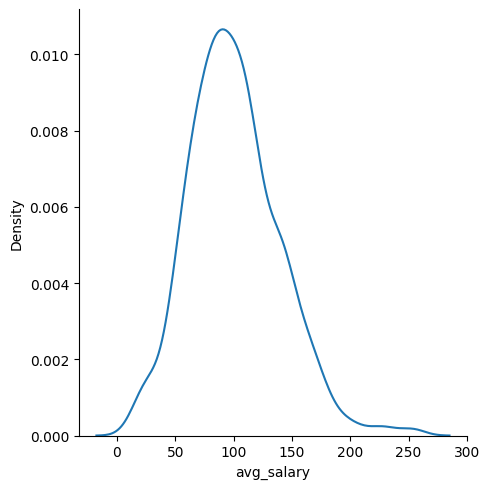

In [413]:
sns.displot(salary_data['avg_salary'],kind='kde');
# normal distribution: avg_salary is normal

Check for **outliers** in the `avg_salary` column using a statistical method  

In [414]:
q75,q25 = np.percentile(salary_data.loc[:,'avg_salary'],[75,25])
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

outliers=[]
a=salary_data.loc[salary_data['avg_salary'] > max,'avg_salary']
b=salary_data.loc[salary_data['avg_salary'] < min,'avg_salary']

outliers.append(a)
outliers.append(b)

print("no out less min",b)

print("Outliers :")
for i in outliers[0] :
  print(i)

no out less min Series([], Name: avg_salary, dtype: float64)
Outliers :
237.5
225.0
205.0
225.0
205.0
254.0
232.5
205.0
254.0
221.5
254.0


🥁Last Question🥁
<br>But this time you're the one asking it!

Ask a question about the data and answer it,

then tell us what insights did that question give you about the data

Your Question: (double click to add)

what the most location have highest salary? 

Text(0.5, 0, 'avg_salary *$1000')

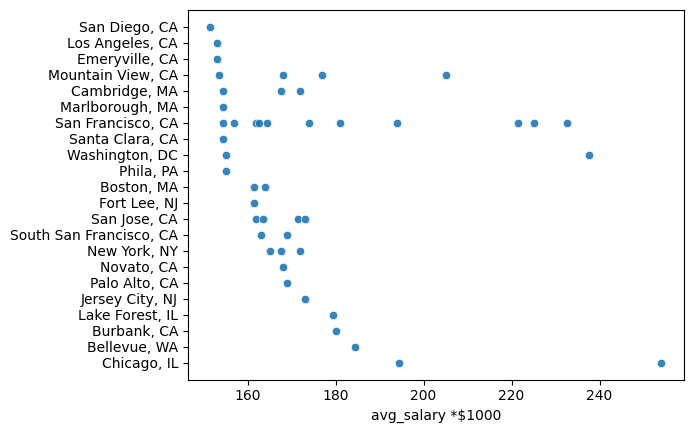

In [415]:
 a=salary_data.groupby('avg_salary')['Location'].value_counts()
avg_salary=[]
Location=[]
for i in range(400,len(a)):
  avg_salary.append(a.index[i][0])
  Location.append(a.index[i][1])

sns.scatterplot(y=Location,x=avg_salary, alpha=0.9)
plt.xlabel("avg_salary *$1000")

Finally run the following cell to save your data, you should find a file named `output_data.csv` in the **Files** menu on the left, download this file along the notebook as both are required to be delivered

In [416]:
salary_data.to_csv("output_data.csv", index=False, encoding="utf-8")

### Extra Questions

Check for **outliers** in the `avg_salary` column using a **graph**

<Axes: >

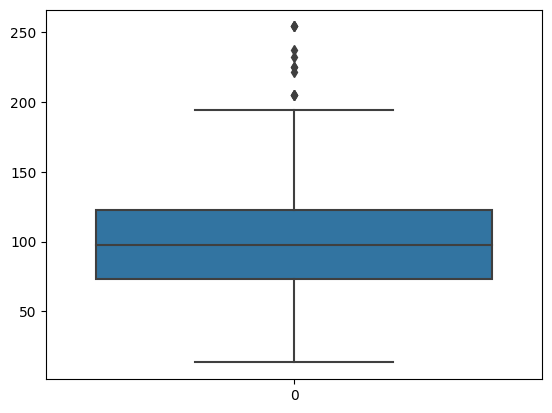

In [417]:
sns.boxplot(salary_data['avg_salary'])
#outliers : from 200 to more than250

What are the jobs with highest avg_salary

In [418]:
salary_data.groupby('job_simp')['avg_salary'].value_counts()


job_simp  avg_salary
analyst   61.0          6
          48.5          4
          45.5          3
          47.0          3
          49.0          3
                       ..
na        125.0         1
          132.5         1
          167.5         1
          168.0         1
          174.0         1
Name: avg_salary, Length: 345, dtype: int64

Which size of companies is having the highest number of job offerings currently

In [419]:
salary_data.shape

(742, 15)

In [420]:
len(salary_data['Company Name'].unique())

343

In [421]:
salary_data['Company Name'].value_counts()

MassMutual                                         14
Reynolds American                                  14
Takeda Pharmaceuticals                             14
Software Engineering Institute                     11
PNNL                                               10
                                                   ..
Dayton Freight Lines, Inc.                          1
Community Action Partnership of San Luis Obispo     1
TrueAccord                                          1
DRB Systems                                         1
Fivestars                                           1
Name: Company Name, Length: 343, dtype: int64

In [422]:
salary_data.head(50)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Industry,Sector,Revenue,avg_salary,python_yn,excel,job_simp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,1973,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),72.0,1,1,data scientist
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,1984,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),87.5,1,0,data scientist
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Security Services,Business Services,$100 to $500 million (USD),85.0,1,1,data scientist
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA",1001 to 5000 employees,1965,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),76.5,1,0,data scientist
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Advertising & Marketing,Business Services,Unknown / Non-Applicable,114.5,1,1,data scientist
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne,"Dallas, TX",201 to 500 employees,2000,Real Estate,Real Estate,$1 to $2 billion (USD),95.0,1,1,data scientist
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage,"Baltimore, MD",501 to 1000 employees,2008,Banks & Credit Unions,Finance,Unknown / Non-Applicable,73.5,0,1,data scientist
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20,"San Jose, CA",201 to 500 employees,2005,Consulting,Business Services,$25 to $50 million (USD),114.0,1,1,data scientist
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health,"Rochester, NY",10000+ employees,2014,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),61.0,0,0,na
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>,"New York, NY",51 to 200 employees,2009,Internet,Information Technology,$100 to $500 million (USD),140.0,1,0,data scientist


Extract the *min salary* and *max salary* from the `Salary Estimate` column for each job

In [423]:
for num1,i in enumerate(salary_data['Salary Estimate']) :
  for num,j in enumerate(i) :
    if j=='(' or j=='P' :
      print(i[0:(num-1)])
      salary_data['Salary Estimate'][num1]=i[0:(num-1)]

$53K-$91K
$63K-$112K
$80K-$90K
$56K-$97K
$86K-$143K
$71K-$119K
$54K-$93K
$86K-$142K
$38K-$84K
$120K-$160K
$126K-$201K
$64K-$106K
$106K-$172K
$46K-$85K
$83K-$144K
$102K-$190K
$67K-$137K
$118K-$189K
$110K-$175K
$64K-$111K
$81K-$130K
$73K-$119K
$86K-$139K
$63K-$105K
$109K-$177K
$63K-$110K
$75K-$124K
$34K-$61K
$63K-$105K
$80K-$90K
$56K-$97K
$72K-$120K
$86K-$143K
$93K-$149K
$85K-$140K
$77K-$135K
$82K-$132K
$83K-$137K
$115K-$180K
$74K-$138K
$64K-$112K
$68K-$129K
$110K-$175K
$52K-$113K
$110K-$150
Employer
$158K-$211K
$20K-$39K
$56K-$117K
$63K-$99K
$68K-$114K
$86K-$143K
$41K-$95K
$86K-$144K
$80K-$139K
$56K-$95K
$120K-$189K
$111K-$176K
$54K-$93K
$71K-$119K
$82K-$132K
$84K-$146K
$107K-$172K
$49K-$85K
$61K-$109K
$88K-$148K
$60K-$99K
$41K-$72K
$96K-$161K
$65K-$130K
$52K-$81K
$139K-$220K
$50K-$102K
$85K-$139K
$74K-$122K
$99K-$157K
$79K-$222K
$57K-$118K
$83K-$137K
$86K-$141K
$94K-$154K
$37K-$76K
$100K-$160K
$55K-$100K
$60K-$114K
$39K-$68K
$106K-$172K
$86K-$142K
$64K-$107K
$31K-$65K
$34K-$62K
$117K-$

In [424]:
# rerun in case you edited the data in the extra questions
salary_data.to_csv("output_data.csv", index=False, encoding="utf-8")

### ⭐⭐**Challenge**⭐⭐
<sub>Note: you have to answer all the questions in order to complete the challenge</sub>

Each Industrie's comapnies average revenue

In [425]:
salary_data.groupby('Location')['Revenue'].value_counts()

Location           Revenue                         
Agoura Hills, CA   $500 million to $1 billion (USD)     1
Alabaster, AL      $25 to $50 million (USD)             1
Alameda, CA        Unknown / Non-Applicable             2
Albuquerque, NM    $1 to $2 billion (USD)               2
                   $50 to $100 million (USD)            1
                                                       ..
Winston-Salem, NC  $10+ billion (USD)                  10
Winter Park, FL    $25 to $50 million (USD)             2
Woburn, MA         $100 to $500 million (USD)           1
Woodbridge, NJ     $10 to $25 million (USD)             2
Worcester, MA      $5 to $10 billion (USD)              5
Name: Revenue, Length: 296, dtype: int64

In [426]:
salary_data.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Industry,Sector,Revenue,avg_salary,python_yn,excel,job_simp
0,Data Scientist,$53K-$91K,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM",501 to 1000 employees,1973,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),72.0,1,1,data scientist
1,Healthcare Data Scientist,$63K-$112K,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD",10000+ employees,1984,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),87.5,1,0,data scientist


What are the % of jobs that are offered from Universities?

In [427]:
# salary_data[salary_data['Company Name']=='Universities']
count=0
for i in salary_data['Company Name'] :
    for num,j in enumerate(i) :
      if j=='U' and i[num:num+len("University")]=='University':
        print(i)
        count +=1
print("the % of jobs :",count/salary_data.shape[0])

University of Maryland Medical System
Johns Hopkins University Applied Physics Laboratory
West Coast University
the % of jobs : 0.004043126684636119


What's the location with the highest company sizes 

In [428]:
salary_data['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: Size, dtype: int64

In [429]:
part_data=salary_data[(salary_data['Size']=='10000+ employees')&(salary_data['Company Name'])]
campaines=part_data['Company Name'].tolist()
campaines

['University of Maryland Medical System',
 'Rochester Regional Health',
 'Walmart',
 'Takeda Pharmaceuticals',
 'Pfizer',
 'Pfizer',
 'Novartis',
 'Visa Inc.',
 'Caterpillar',
 'Liberty Mutual Insurance',
 'Swiss Re',
 'Northrop Grumman',
 "DICK'S Sporting Goods - Corporate",
 'HP Inc.',
 'Grainger',
 'HP Inc.',
 'Pactera',
 'Walmart',
 'General Dynamics Information Technology',
 'American Axle & Manufacturing',
 'Takeda Pharmaceuticals',
 'Visa Inc.',
 'The Church of Jesus Christ of Latter-day Saints',
 'AVANADE',
 'Genentech',
 'Takeda Pharmaceuticals',
 'Western Digital',
 'The Church of Jesus Christ of Latter-day Saints',
 'Takeda Pharmaceuticals',
 'Takeda Pharmaceuticals',
 'Takeda Pharmaceuticals',
 'Rochester Regional Health',
 'Rochester Regional Health',
 'Pilot Flying J Travel Centers LLC',
 'Lockheed Martin',
 'Veterans Affairs, Veterans Health Administration',
 'Genentech',
 'Takeda Pharmaceuticals',
 'Western Digital',
 'The Church of Jesus Christ of Latter-day Saints',
 

In [430]:
# rerun in case you edited the data in the challenge questions
salary_data.to_csv("output_data.csv", index=False, encoding="utf-8")

---
<center>
<font size=4, face='helvetica'>ML Committee</font><br>
<font size=5, color='#ffb71c'>S</font><font size=4, face='helvetica'>upport ASU </font></center>